In [1]:
# Step 1: Install mlxtend if you haven't
# pip install mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv("MBA.csv")

# Convert DataFrame rows to a list of transactions
transactions = df.values.tolist()
transactions = [[item for item in transaction if pd.notnull(item)] for transaction in transactions]

# Convert transactions to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort and display results
print("Top Frequent Itemsets:\n", frequent_itemsets.sort_values(by="support", ascending=False).head())
print("\nTop Association Rules:\n", rules.sort_values(by="lift", ascending=False).head())

# Optional: Save rules to a CSV file
rules.to_csv("market_basket_rules.csv", index=False)


Top Frequent Itemsets:
      support         itemsets
34  0.238267  (mineral water)
13  0.179733           (eggs)
44  0.174133      (spaghetti)
17  0.170933   (french fries)
9   0.163867      (chocolate)

Top Association Rules:
       antecedents      consequents  antecedent support  consequent support  \
67    (spaghetti)    (ground beef)            0.174133            0.098267   
66  (ground beef)      (spaghetti)            0.098267            0.174133   
88    (spaghetti)      (olive oil)            0.174133            0.065733   
89    (olive oil)      (spaghetti)            0.065733            0.174133   
81         (soup)  (mineral water)            0.050533            0.238267   

     support  confidence      lift  representativity  leverage  conviction  \
67  0.039200    0.225115  2.290857               1.0  0.022088    1.163699   
66  0.039200    0.398915  2.290857               1.0  0.022088    1.373959   
88  0.022933    0.131700  2.003547               1.0  0.011487    1.

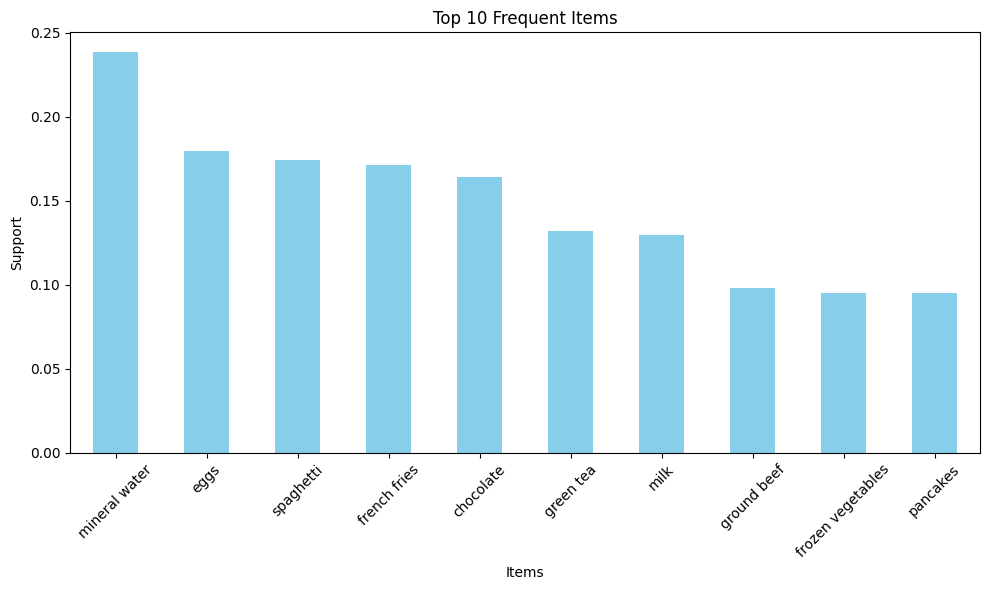

In [3]:
# Re-import necessary components and reprocess since session reset
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("MBA.csv")

# Prepare transaction list
transactions = df.values.tolist()
transactions = [[item for item in transaction if pd.notnull(item)] for transaction in transactions]

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets and rules
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Plot: Top 10 frequent items
plt.figure(figsize=(10, 6))
top_items = frequent_itemsets.explode('itemsets')
top_items['item'] = top_items['itemsets'].astype(str)
top_items = top_items.groupby('item')['support'].max().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', color='skyblue')
plt.title("Top 10 Frequent Items")
plt.ylabel("Support")
plt.xlabel("Items")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Heatmap of Lift vs Confidence for Association Rules
 

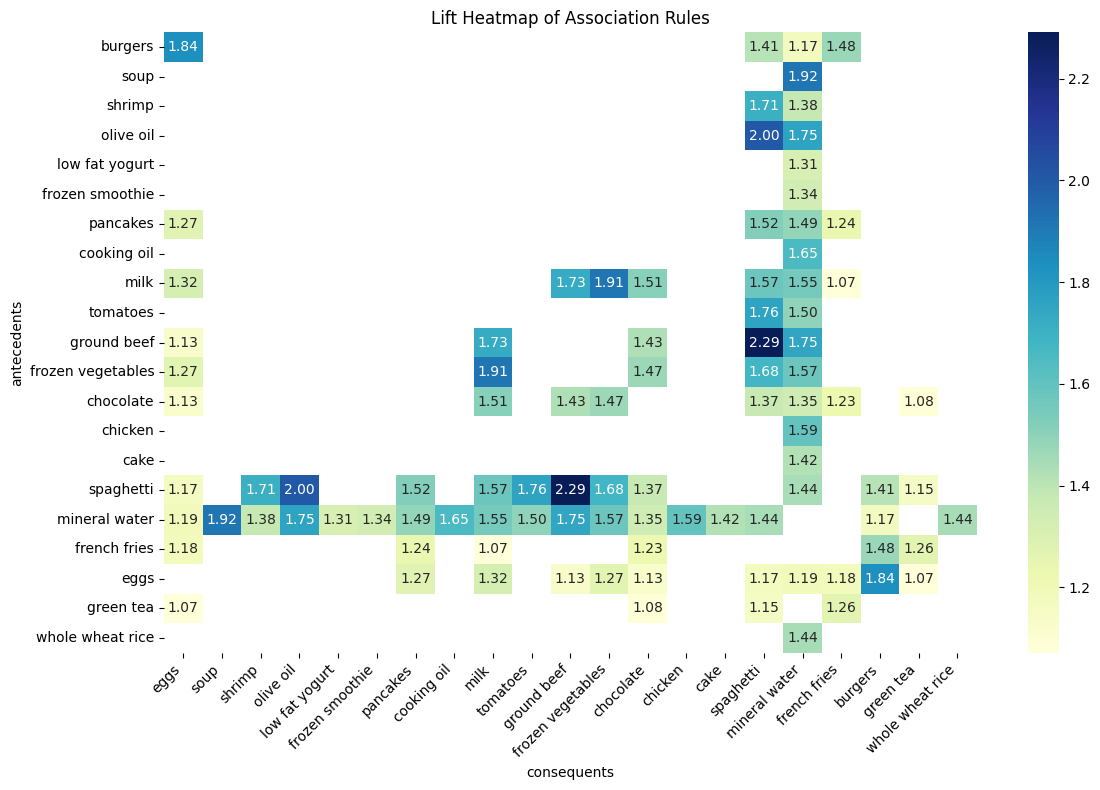

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("MBA.csv")

# Prepare transactions
transactions = df.values.tolist()
transactions = [[item for item in row if pd.notnull(item)] for row in transactions]

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets and rules
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Prepare data for heatmap
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

# Convert frozensets to strings for readability
heatmap_data.index = heatmap_data.index.map(lambda x: ', '.join(list(x)))
heatmap_data.columns = heatmap_data.columns.map(lambda x: ', '.join(list(x)))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Lift Heatmap of Association Rules")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\shrin\AppData\Local\Temp\ipykernel_18352\2339251979.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


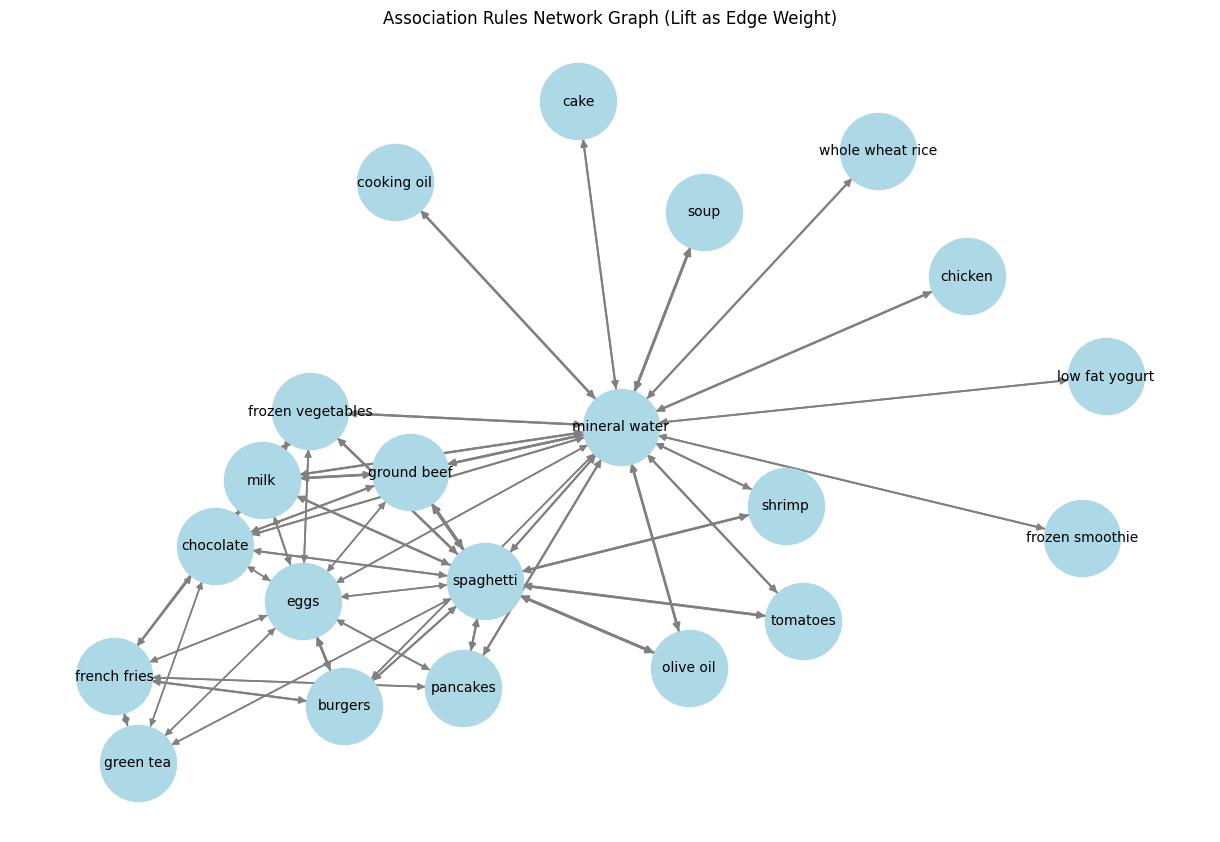

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the association rules
rules = pd.read_csv("market_basket_rules.csv")

# Create a directed graph
G = nx.DiGraph()

# Add edges with lift as weights
for _, row in rules.iterrows():
    antecedents = eval(row['antecedents'])
    consequents = eval(row['consequents'])
    for ant in antecedents:
        for con in consequents:
            G.add_edge(ant, con, weight=row['lift'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, width=weights, edge_color="gray")
plt.title("Association Rules Network Graph (Lift as Edge Weight)")
plt.tight_layout()
plt.show()


You can spot:

🔵 Rules in the top-right = very strong and common

🟢 Rules in the top-left = strong but rare

🟠 Middle = moderate

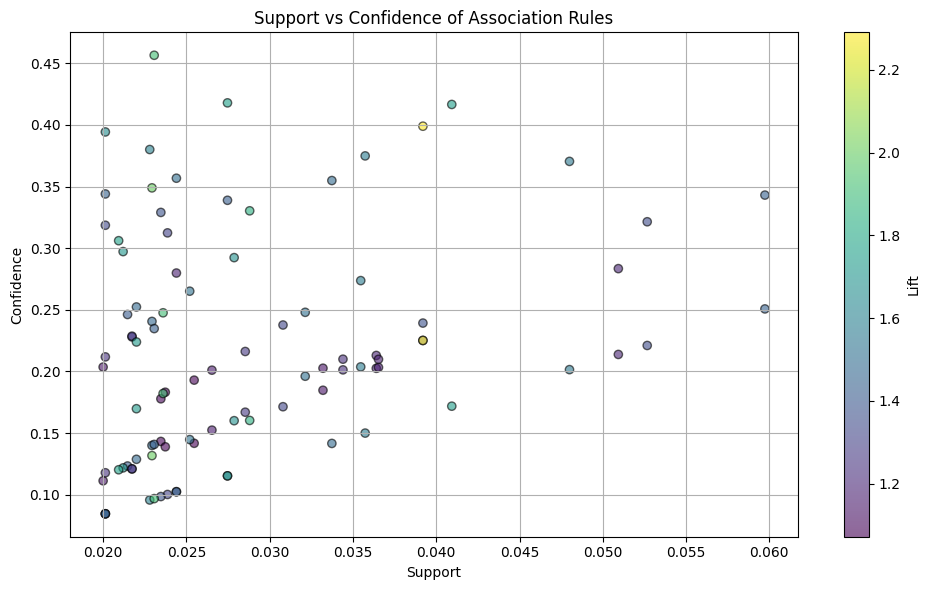

In [8]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence of Association Rules')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
summary = rules[['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric', 'jaccard', 'kulczynski']].describe()
print(summary)


         support  confidence       lift   leverage  conviction  zhangs_metric  \
count  96.000000   96.000000  96.000000  96.000000   96.000000      96.000000   
mean    0.028953    0.218056   1.460445   0.008480    1.093764       0.345825   
std     0.009368    0.090995   0.269324   0.004475    0.080598       0.144105   
min     0.020000    0.084499   1.071339   0.001580    1.010736       0.076504   
25%     0.022600    0.141663   1.258189   0.005556    1.038514       0.233584   
50%     0.024800    0.203602   1.436088   0.008034    1.063160       0.355405   
75%     0.033900    0.275201   1.609810   0.011123    1.121734       0.450167   
max     0.059733    0.456464   2.290857   0.022088    1.401441       0.682292   

         jaccard  kulczynski  
count  96.000000   96.000000  
mean    0.104927    0.218056  
std     0.023957    0.038209  
min     0.071564    0.157402  
25%     0.086081    0.190958  
50%     0.098195    0.211300  
75%     0.116174    0.239606  
max     0.169376    0.

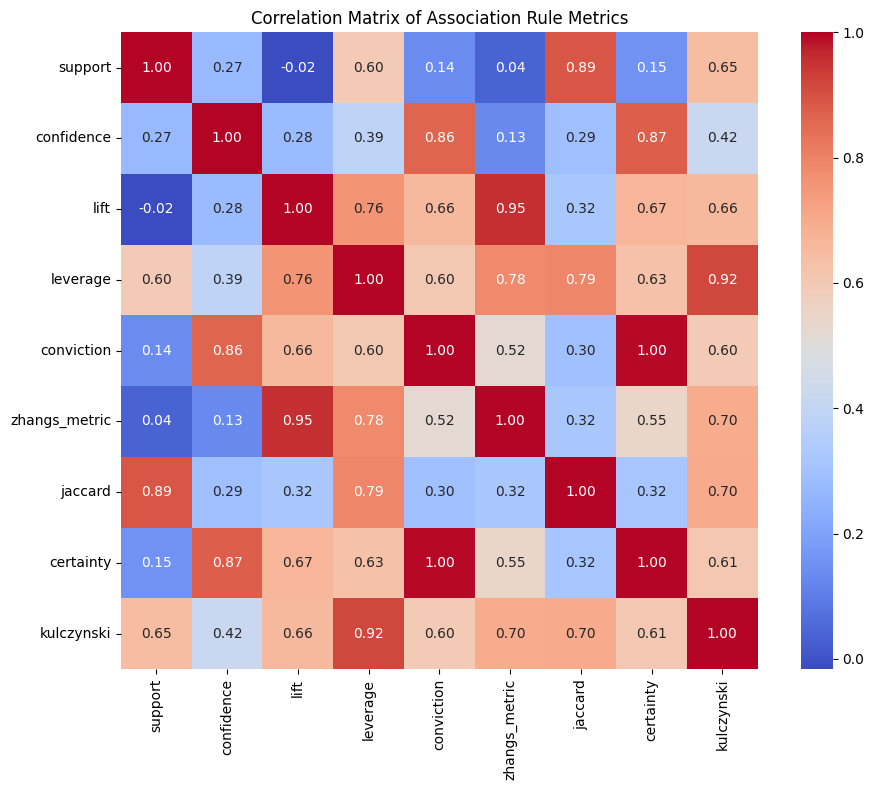

In [12]:
# Step 1: Install necessary libraries (if not already installed)
# pip install pandas matplotlib seaborn mlxtend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Load the dataset
df = pd.read_csv("MBA.csv")
transactions = df.values.tolist()
transactions = [[item for item in transaction if pd.notnull(item)] for transaction in transactions]

# Step 3: One-hot encoding of transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Step 5: Generate rules with multiple metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 6: Normalize important metrics for comparison
metrics = ['support', 'confidence', 'lift', 'leverage', 'conviction',
           'zhangs_metric', 'jaccard', 'certainty', 'kulczynski']
normalized = rules[metrics].copy()
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())

# Step 7: Save normalized metrics and correlation matrix
normalized.to_csv("normalized_rule_metrics.csv", index=False)
correlation_matrix = normalized.corr()
correlation_matrix.to_csv("metric_correlation_matrix.csv")

# Step 8: Visualize as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Association Rule Metrics")
plt.tight_layout()
plt.savefig("metric_comparison_heatmap.png")
plt.show()
